In [1]:
# https://stackoverflow.com/questions/45230448/how-to-get-reproducible-result-when-running-keras-with-tensorflow-backend

import numpy as np
import tensorflow as tf
import random as rn

import os
os.environ['PYTHONHASHSEED'] = '0'

np.random.seed(42)


rn.seed(12345)


session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from keras import backend as K



tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [5]:


import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt



# from tensorflow.python.framework import ops
import warnings


#code tutorial
#https:////github.com//PacktPublishing//Practical-Convolutional-Neural-Networks//blob//master//Chapter03//Traffic//custom.py

Train_IMAGE_DIR = "C://New folder//OneDrive//ai class//Final Project//BelgiumTSC_Training//"
Test_IMAGE_DIR = "C://New folder//OneDrive//ai class//Final Project//BelgiumTSC_Testing//"

# Train_IMAGE_DIR = 'C:/Users/bipul/niva/BelgiumTSC_Training/'
# Test_IMAGE_DIR = 'C:/Users/bipul/niva/BelgiumTSC_Testing/'

def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all the subdirectories of the data folder (i.e. traing or test). Each folder represents an unique label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    
    # Iterate for loop through the label directories and collect the data in two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".ppm")]

        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

# Load training and testing datasets.
# train_data_dir = os.path.join(Train_IMAGE_DIR, "Training")
# test_data_dir = os.path.join(Test_IMAGE_DIR, "Testing")



images1, labels1 = load_data(Train_IMAGE_DIR)
images2, labels2 = load_data(Test_IMAGE_DIR)

# images1, labels1 = load_data(train_data_dir)
# images2, labels2 = load_data(test_data_dir)

#combine training and testing data

# images = images1 + images2
# labels = labels1 + labels2

# #combine training and testing data

images = images1 + images2
labels = labels1 + labels2

"Resize images"
images32 = [skimage.transform.resize(image, (32, 32), mode='constant')
                for image in images]

C:\Users\nibha\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Out Fully Connected – 1,000 – – – Softmax 
F9 Fully Connected – 4,096 – – – ReLU 
F8 Fully Connected – 4,096 – – – ReLU 
C7 Convolution 256 13 × 13 3 × 3 1 SAME ReLU 
C6 Convolution 384 13 × 13 3 × 3 1 SAME ReLU C5 
Convolution 384 13 × 13 3 × 3 1 SAME ReLU 
S4 Max Pooling 256 13 × 13 3 × 3 2 VALID – 
C3 Convolution 256 27 × 27 5 × 5 1 SAME ReLU 
S2 Max Pooling 96 27 × 27 3 × 3 2 VALID – 
C1 Convolution 96 55 × 55 11 × 11 4 SAME ReLU I
n Input 3 (RGB) 224 × 224 – – – –


In [6]:
from sklearn.model_selection import train_test_split

# images_array = np.array(images32)
labels_array = np.array(labels)
images_array = np.array(images32)

from keras.utils import np_utils

images_array = images_array.astype('float32') / 255.
labels_array = np_utils.to_categorical(labels_array, 62)

(X_train, X_test, y_train, y_test) = train_test_split(images_array,labels_array, test_size=0.25, random_state=0, shuffle=True)

#Set the initial parameters
batch_size = 128
nb_classes = 10
nb_epoch = 10
          
img_rows, img_cols = 32,32


X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)


input_shape = (img_rows, img_cols, 3)
    


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D,AveragePooling2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.initializers import glorot_uniform 

glorot_uniform(seed=0)

In [7]:
"method for building graphs"

def epoch_graph(hs,num):


    plt.plot(hs.history['acc'])
    plt.plot(hs.history['val_acc'])
    plt.title('model '+ num +' accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(1-np.asarray(hs.history['acc']))
    plt.plot(1-np.asarray(hs.history['val_acc']))
    plt.title('model '+ num +' error')
    plt.ylabel('error rate')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

    plt.plot(hs.history['loss'])
    plt.plot(hs.history['val_loss'])
    plt.title('model '+ num +' loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


In [ ]:
"CNN model 1"

In [288]:
pool_size=(2,2)

cnn1 = Sequential([
    Convolution2D(32,3,padding='same', activation='relu',kernel_initializer=glorot_uniform(seed=0), input_shape=(32,32,3)),
    MaxPooling2D(pool_size=pool_size, strides=(2,2), padding='same'),
    Dropout(.10, seed= 0),
    Convolution2D(64,5, padding='same',kernel_initializer=glorot_uniform(seed=0),activation='relu'),
    MaxPooling2D(pool_size=pool_size, strides=(2,2), padding='same'),
    Dropout(.20, seed= 0),
    Convolution2D(128,7, padding='same',kernel_initializer=glorot_uniform(seed=0),activation='relu'),
    MaxPooling2D(pool_size=pool_size, strides=(2,2), padding='same'),
    Flatten(),
    Dropout(.30, seed= 0),
    Dense(256, activation='relu'),
    Dropout(.40),
    Dense(62, activation='softmax')
])

# cnn1.summary()

In [ ]:
"CNN Model 2"

In [10]:
pool_size=(2,2)
cnn2 = Sequential([
    Convolution2D(32,5,padding='same', activation='tanh', input_shape=(32,32,3)),
    AveragePooling2D(pool_size=pool_size, strides=(2,2), padding='same'),
    Dropout(.10, seed= 0),
    Convolution2D(64,5, padding='same', activation='tanh'),
    AveragePooling2D(pool_size=pool_size, strides=(2,2), padding='same'),
    Dropout(.20, seed= 0),
    Convolution2D(128,5, padding='same', activation='tanh'),
    AveragePooling2D(pool_size=pool_size, strides=(2,2), padding='same'),
    Flatten(),
    Dropout(.30, seed= 0),
    Dense(256, activation='tanh'),
    Dropout(.40, seed= 0),
    Dense(62, activation='softmax')
])

# cnn2.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


The model weights are initialised randomly according to the initialization
type. In general stochastic optimisation is not known to yield the exact
same result each time. That's why people like to use ensembles of models to
give more accurate predictions.

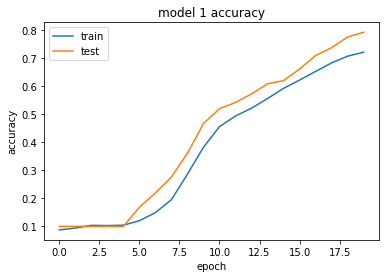

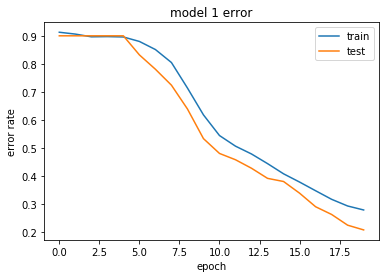

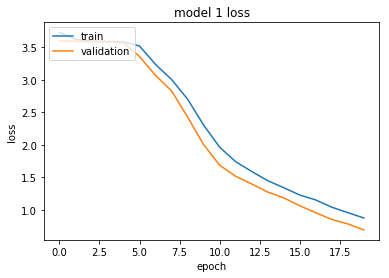

In [289]:
"compile and fit model1"

opt = Adam(lr=0.001)
cnn1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn1.fit(x=X_train,y= y_train, validation_data=(X_test, y_test),epochs=30, batch_size=128, shuffle=False, verbose=0)

epoch_graph(history,"1")


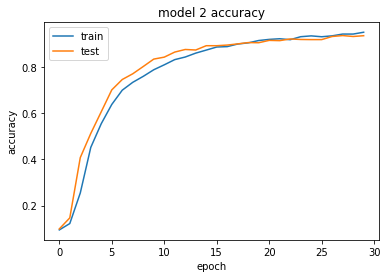

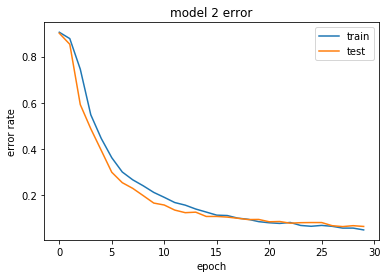

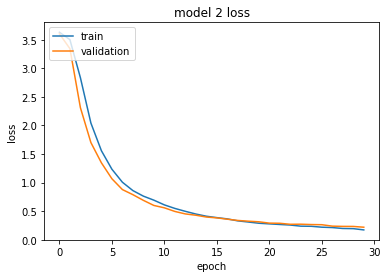

In [294]:
"compile and fit model 2"

opt = Adam(lr=0.001)
cnn2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history2 = cnn2.fit(x=X_train,y= y_train, validation_data=(X_test, y_test),epochs=30, batch_size=128, shuffle=False, verbose=0)

epoch_graph(history2,"2")

In [57]:
"convert from list to array"

new_data = images_array
new_label = labels_array
new_labels=np.asarray(labels1+labels2)

In [58]:
new_labels

array([ 0,  0,  0, ..., 61, 61, 61])

In [ ]:
from imblearn.metrics import sensitivity_specificity_support
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, classification_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split, LeaveOneOut, KFold, cross_val_score,cross_val_predict

In [66]:

"divide data into 4 folds"

kf = KFold(n_splits=4)
fold1, fold2, fold3, fold4 = kf.split(new_data)

xtrain1,xtest1=new_data[fold1[0]],new_data[fold1[1]]
ytrain1,ytest1=new_labels[fold1[0]],new_labels[fold1[1]]

xtrain2,xtest2=new_data[fold2[0]],new_data[fold2[1]]
ytrain2,ytest2=new_labels[fold2[0]],new_labels[fold2[1]]

xtrain3,xtest3=new_data[fold3[0]],new_data[fold3[1]]
ytrain3,ytest3=new_labels[fold3[0]],new_labels[fold3[1]]

xtrain4,xtest4=new_data[fold4[0]],new_data[fold4[1]]
ytrain4,ytest4=new_labels[fold4[0]],new_labels[fold4[1]]





"divide data into 4 folds"

kf = KFold(n_splits=4)
fold1, fold2, fold3, fold4 = kf.split(new_data)

xtrain1,xtest1=new_data[fold1[0]],new_data[fold1[1]]
ytrain1,ytest1=new_label[fold1[0]],new_label[fold1[1]]

xtrain2,xtest2=new_data[fold2[0]],new_data[fold2[1]]
ytrain2,ytest2=new_label[fold2[0]],new_label[fold2[1]]

xtrain3,xtest3=new_data[fold3[0]],new_data[fold3[1]]
ytrain3,ytest3=new_label[fold3[0]],new_label[fold3[1]]

xtrain4,xtest4=new_data[fold4[0]],new_data[fold4[1]]
ytrain4,ytest4=new_label[fold4[0]],new_label[fold4[1]]




In [39]:
"only use model 2 since it for better results"

opt = Adam(lr=0.001)
cnn2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [71]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.losses import sparse_categorical_crossentropy, categorical_crossentropy
from keras.initializers import glorot_uniform, he_normal
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image import ImageDataGenerator, array_to_img

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split, LeaveOneOut, KFold, cross_val_score,cross_val_predict
from sklearn.neighbors import KNeighborsClassifier 
from imblearn.metrics import sensitivity_specificity_support

In [41]:
cnn2.fit(x=xtrain1,y= ytrain1, validation_data=(xtest1, ytest1),epochs=30, batch_size=128, shuffle=False, verbose=0)
    
    
    

In [42]:
pred= cnn2.predict(xtest1)

In [44]:
cnn_pred = np.argmax(np.round(pred), axis=1)

In [45]:
cnn_pred

array([ 1,  1,  1, ..., 31, 31, 31], dtype=int64)

In [67]:
ytest1

array([ 0,  0,  0, ..., 31, 31, 31])

In [68]:
report2= sensitivity_specificity_support(ytest1,cnn_pred,average='weighted')
print(report2)

(0.6071025930101466, 0.9884744031024253, None)


C:\Users\nibha\Anaconda3\lib\site-packages\imblearn\metrics\_classification.py:243: UndefinedMetricWarning: Sensitivity is ill-defined and being set to 0.0 in labels with no true samples.
  average, warn_for)


In [73]:
report1= classification_report(ytest1,cnn_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.01      0.13      0.02        15
           1       0.84      0.69      0.76       110
           2       0.14      0.15      0.15        13
           3       1.00      0.07      0.12        15
           4       0.04      0.07      0.05        15
           5       1.00      0.36      0.53        11
           6       1.00      0.06      0.11        18
           7       0.86      0.24      0.38       157
           8       0.14      0.04      0.06        27
           9       0.00      0.00      0.00        18
          10       0.65      0.62      0.63        21
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00        18
          13       0.70      0.60      0.65        90
          14       0.25      0.07      0.11        43
          15       0.00      0.00      0.00         9
          16       0.13      0.22      0.17         9
          17       0.44    

C:\Users\nibha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nibha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [77]:
report3=accuracy_score(ytest1,cnn_pred)
print(report3)

0.6071025930101466


In [34]:
def get_eval(X_train, X_test, y_train, y_test):
    
#     scaler= StandardScaler(with_std=False)
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)
  
    cnn2.fit(x=X_train,y= y_train, validation_data=(X_test, y_test),epochs=30, batch_size=128, shuffle=False, verbose=0)
    preddd= cnn2.predict(X_test)
    cnn_pred = np.argmax(np.round(preddd), axis=1)
    
    
    report1= classification_report(y_test,cnn_pred)
    print(report1)
    report2= sensitivity_specificity_support(y_test,cnn_pred,average='weighted')
    print(report2)
    report3=accuracy_score(X_test, y_test)
    preint(report3)
    
    

In [ ]:
score2 = get_eval(xtrain2,xtest2,ytrain2,ytest2)

In [ ]:
score3 = get_eval(xtrain3,xtest3,ytrain3,ytest3)

In [ ]:
score4 = get_eval(xtrain4,xtest4,ytrain4,ytest4)